<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/purna135/ML-Datasets/main/weight-height.csv")

In [2]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.drop("Gender", inplace = True, axis = 1)

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


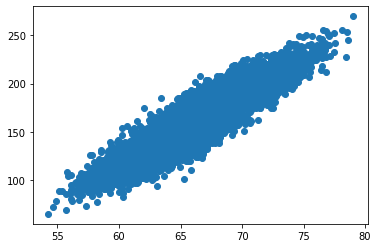

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["Height"], df["Weight"])

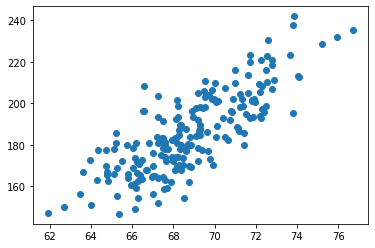

In [6]:
X = df["Height"][:200]
Y = df["Weight"][:200]

plt.scatter(X, Y)

In [7]:
X.values

array([73.84701702, 68.78190405, 74.11010539, 71.7309784 , 69.88179586,
       67.25301569, 68.78508125, 68.34851551, 67.01894966, 63.45649398,
       71.19538228, 71.64080512, 64.76632913, 69.2830701 , 69.24373223,
       67.6456197 , 72.41831663, 63.97432572, 69.6400599 , 67.93600485,
       67.91505019, 69.43943987, 66.14913196, 75.20597361, 67.89319634,
       68.1440328 , 69.08963143, 72.80084352, 67.42124228, 68.49641536,
       68.61811055, 74.03380762, 71.52821604, 69.1801611 , 69.57720237,
       70.40092889, 69.07617117, 67.19352328, 65.80731565, 64.30418789,
       67.97433623, 72.18942596, 65.27034552, 66.09017738, 67.51032152,
       70.10478626, 68.25183644, 72.17270912, 69.17985762, 72.87036015,
       64.78258298, 70.18354989, 68.49145025, 67.33083088, 66.99094408,
       66.4995499 , 68.35305665, 70.77445907, 71.21592367, 70.01336535,
       71.40318222, 69.55200509, 73.81853456, 66.99688275, 71.41846589,
       65.27930021, 68.27419147, 72.76536995, 68.0993798 , 68.89

In [8]:
X.shape

(200,)

In [9]:
import numpy as np

X = np.array(X).reshape(-1, 1)
X.shape

(200, 1)

In [10]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       [71.7309784 ],
       [69.88179586],
       [67.25301569],
       [68.78508125],
       [68.34851551],
       [67.01894966],
       [63.45649398],
       [71.19538228],
       [71.64080512],
       [64.76632913],
       [69.2830701 ],
       [69.24373223],
       [67.6456197 ],
       [72.41831663],
       [63.97432572],
       [69.6400599 ],
       [67.93600485],
       [67.91505019],
       [69.43943987],
       [66.14913196],
       [75.20597361],
       [67.89319634],
       [68.1440328 ],
       [69.08963143],
       [72.80084352],
       [67.42124228],
       [68.49641536],
       [68.61811055],
       [74.03380762],
       [71.52821604],
       [69.1801611 ],
       [69.57720237],
       [70.40092889],
       [69.07617117],
       [67.19352328],
       [65.80731565],
       [64.30418789],
       [67.97433623],
       [72.18942596],
       [65.27034552],
       [66.09017738],
       [67.51032152],
       [70

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 30)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_train)

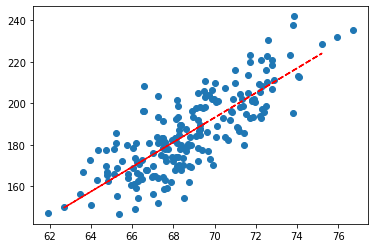

In [14]:
plt.scatter(X, Y)
plt.plot(X_train.reshape(-1), y_pred, "r--")

In [15]:
lr.coef_

array([5.93545178])

In [16]:
lr.intercept_

-222.38381491856055

In [17]:
x = [[73]]
lr.predict(x)

array([210.90416509])

In [18]:
#m - slope
# c - intercept

# y = m * x + c

m = lr.coef_
c = lr.intercept_



In [19]:
y_pred = m * x + c
y_pred

array([[210.90416509]])

In [20]:
X.shape[0]

200

In [21]:
class CustomRL():
  def __init__(self):
    self.m = None
    self.c = None

  def fit(self, X, Y):
    p = 0
    q = 0

    for i in range(X.shape[0]):
      p += (Y.iloc[i] - Y.mean()) * (X[i] - X.mean())
      q += (X[i] - X.mean()) ** 2

    self.m = p/q
    self.c = Y.mean() - self.m * X.mean()

  def predict(self, X):
    return self.m * X + self.c

In [22]:
clr = CustomRL()

In [23]:
clr.fit(X_train, y_train)

In [24]:
y_custom_pred = clr.predict(X_train)

In [25]:
y_pred = lr.predict(X_train)

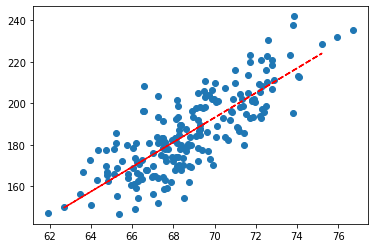

In [26]:
plt.scatter(X, Y)
plt.plot(X_train.reshape(-1), y_pred, "r--")

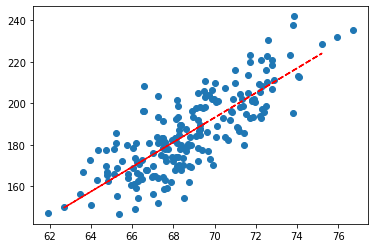

In [27]:
plt.scatter(X, Y)
plt.plot(X_train.reshape(-1), y_custom_pred, "r--")

In [28]:
print("Slope: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Slope:  [5.93545178]
Intercept:  -222.38381491856055


In [29]:
print("Slope: ", clr.m)
print("Intercept: ", clr.c)

Slope:  [5.93545178]
Intercept:  [-222.38381492]


In [52]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 30)

In [58]:
from IPython.display import clear_output

In [59]:
class MyLinearRegression():
  def __init__(self, learn_rate, iteration):
    self.learn_rate = learn_rate
    self.iteration = iteration
  
  def fit(self, X, y):
    row, col = X.shape

    self.w = np.random.rand(col)
    self.b = np.random.randint(0, 10)

    for i in range(self.iteration):
        y_pred = self.predict(X)

        dw = -2 * (X.T).dot(y - y_pred) / row
        db = -2 * (y - y_pred).sum() / row

        self.w = self.w - self.learn_rate * dw
        self.b = self.b - self.learn_rate * db
        
        clear_output(wait = True)
        plt.scatter(X, y)
        plt.plot(X, y_pred, color="r")
        plt.title("Interation"+str(i))
        plt.show()

  def predict(self, X):
    return X.dot(self.w) + self.b

In [62]:
mylr = MyLinearRegression(0.1, 200)

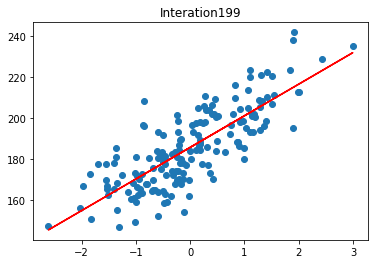

In [63]:
mylr.fit(X_train, y_train)

In [71]:
y_pred = mylr.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
mean_absolute_error(y_test, y_pred)

9.254316319992641

In [76]:
mse = mean_squared_error(y_test, y_pred)
mse

130.0484965207015

In [75]:
r2_score(y_test, y_pred)

0.6922396607487304

In [77]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

In [78]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2

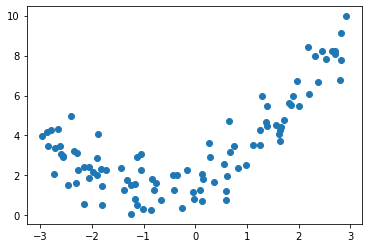

In [80]:
plt.scatter(X, y)

In [81]:
lr.fit(X, y)

LinearRegression()

In [82]:
y_pred = lr.predict(X)

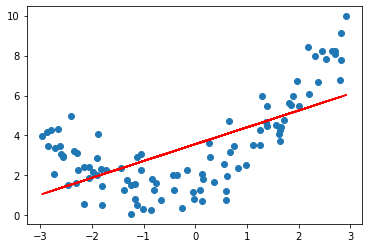

In [84]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="r")